Taxicab dataset? https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [1]:
import pandas as pd
dfs = pd.read_html("https://www.opentable.com/state-of-industry")
assert len(dfs) == 1
dfs[0].head()

,Name,4/17,4/16,4/15,4/14,4/13,4/12,4/11,4/10,4/09,...,2/27,2/26,2/25,2/24,2/23,2/22,2/21,2/20,2/19,2/18
0,Global,-100%,-100%,-100%,-100%,-100%,-100%,-100%,-100%,-100%,...,-3%,-2%,1%,1%,4%,1%,-2%,-1%,3%,-1%
1,Australia,-100%,-100%,-100%,-100%,-100%,-100%,-100%,-100%,-100%,...,-7%,-2%,-2%,0%,0%,0%,-1%,-3%,-6%,-3%
2,Canada,-100%,-100%,-100%,-100%,-100%,-100%,-100%,-100%,-100%,...,-12%,1%,-3%,-2%,8%,-1%,-2%,-3%,0%,-5%
3,Germany,-100%,-100%,-100%,-100%,-100%,-100%,-100%,-100%,-100%,...,5%,5%,4%,11%,2%,1%,5%,3%,4%,11%
4,Ireland,-100%,-100%,-100%,-100%,-100%,-100%,-100%,-100%,-100%,...,-2%,-10%,-8%,-9%,4%,-3%,1%,4%,0%,2%


"Down 60%"

In [2]:
from datetime import datetime
def perc_to_num(x):
    return int(x.replace("%", ""))# / 100

def to_datetime(x):
    m, d = x.split("/")
    return datetime(2020, int(m), int(d))

df = dfs[0].melt(id_vars="Name", var_name="date", value_name="frac")
df.frac = df.frac.apply(perc_to_num)
df.date = df.date.apply(to_datetime)
df.head()

,Name,date,frac
0,Global,2020-04-17,-100
1,Australia,2020-04-17,-100
2,Canada,2020-04-17,-100
3,Germany,2020-04-17,-100
4,Ireland,2020-04-17,-100


In [3]:
df.to_csv("data/open-table-countries.csv", index=False)

In [4]:
df.Name.unique()

array(['Global', 'Australia', 'Canada', 'Germany', 'Ireland', 'Mexico',
       'United Kingdom', 'United States'], dtype=object)

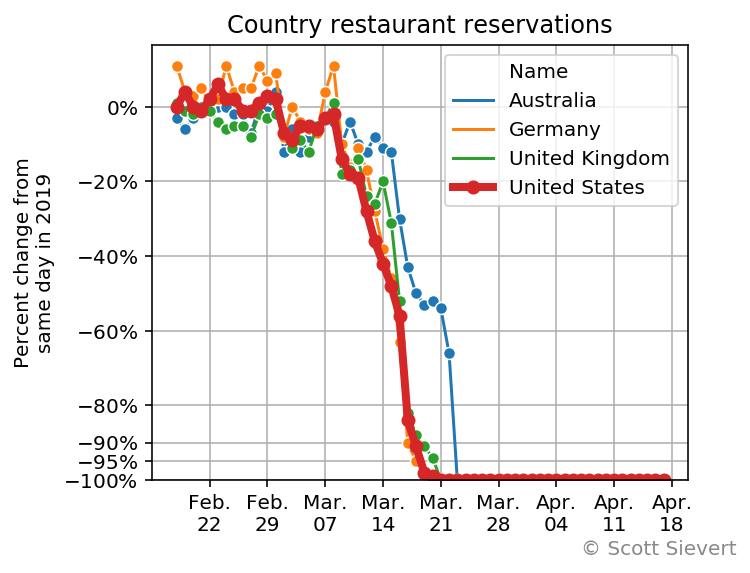

In [5]:
import altair as alt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import timedelta
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

show = df.Name.isin(["Germany", "United Kingdom", "Australia"])

w = 4
fig, ax = plt.subplots(figsize=(1.2 * w, w))
ax = sns.lineplot(
    data=df[show],
    x="date",
    y="frac",
    hue="Name",
    marker="o",
    ax=ax,
)
us = df[df.Name == "United States"].sort_values(by="date")
ax.plot(us.date, us.frac, "C3o-", linewidth=4, label="United States")


ax.grid()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b.\n%d'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:0.0f}$%"))

import numpy as np
weeks = pd.date_range(start=datetime(2020, 2, 22), end=df.date.max() + timedelta(4), freq="7D")
weeks_mpl = [mdates.date2num(w) for w in weeks]
ax.xaxis.set_major_locator(plt.FixedLocator(weeks_mpl))
ticks = (-np.arange(5) * 20).tolist()
ticks.extend([-90, -95, -100])
ax.yaxis.set_major_locator(plt.FixedLocator(ticks))

ax.set_title("Country restaurant reservations")
ax.set_ylabel("Percent change from\nsame day in 2019")
ax.set_xlabel("")
ax.legend(loc="best")
ax.set_ylim(-100, None)
xlim = ax.get_xlim()
ax.text(xlim[1] - 13, -120, "© Scott Sievert", color="#" + "8" * 6)
fig.savefig("imgs/opentable.svg", bbox_inches="tight")
fig.savefig("imgs/opentable.png", bbox_inches="tight", dpi=300)